In [251]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [323]:
scores = pickle.load(open( "../data/scores.p", "rb" ) )

scores = pd.DataFrame(scores).transpose()
scores.columns = ['tags', 'summaries', 'reviews']
scores

,tags,summaries,reviews
318,"[0.010404243459975683, -0.03711091424722951, -...","[-0.05456358267657277, 0.017882220814185994, -...","[0.008589482039153076, -0.04855025633974395, -..."
58559,"[0.015807914369425177, -0.03457502015267174, -...","[-0.03988684186122802, -0.005511437332531161, ...","[0.012581701212091864, -0.04692592556113569, -..."
122886,"[0.0056174542458497624, -0.03233655629759736, ...","[0.004428010250534852, -0.002030431507487334, ...","[0.016075299481108408, -0.03870372064945349, -..."
4993,"[0.004249768748361458, -0.03930756938482146, -...","[0.01519089428132827, -0.04385203333833831, -0...","[0.010687121155008764, -0.04963987875309132, -..."
109487,"[0.00811719691063506, -0.04238477095105229, -0...","[-0.02410308055480398, -0.05450325641211108, -...","[0.009403795113320948, -0.051834653924076005, ..."
...,...,...,...
74452,"[0.0008180387079011805, -0.03338096179304384, ...","[0.08489998374762733, -0.022591222972381503, 0...","[0.014455129071002331, -0.04643171947826584, -..."
173925,"[0.018107255184097, -0.03432979957189464, -0.0...","[0.05444138650899487, 0.002688046837188467, -0...","[0.013429640770079703, -0.0472446566949165, -0..."
7346,"[0.01914980665964094, -0.03249555608958915, -0...","[0.035217951886104985, 0.023912770514699578, 0...","[0.01124561640856897, -0.048944016973167984, -..."
128838,"[-0.003723096374575606, -0.02864027085830133, ...","[0.00693218848649928, -0.004969215505172796, 0...","[0.013426135012632064, -0.04556446395553769, -..."


In [253]:
budget = pd.read_csv('../data/movie_industry.csv', encoding = 'latin')

In [128]:
movies = pd.read_csv('../data/movie_lense/movies.csv')
for i in range(len(movies)):
    movies.title.iloc[i]  = movies.title.iloc[i][:-7]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [324]:
titles = []

for key in scores.index:
    titles.append(movies[movies.movieId == key]['title'].iloc[0])
    
scores['titles'] = titles

In [100]:
merged = pd.merge(scores, budget, left_on = 'titles', right_on =  'name', how = 'left')
merged.to_csv('../data/merged.csv')

In [157]:
gen_counts = merge_label.genre.value_counts()
gen_counts = gen_counts / gen_counts.sum() * 100
gen_counts 

Action       39.108911
Drama        16.996700
Comedy       11.386139
Adventure     8.580858
Crime         8.250825
Horror        5.775578
Animation     4.455446
Biography     3.135314
Mystery       1.320132
Fantasy       0.495050
Sci-Fi        0.330033
Thriller      0.165017
Name: genre, dtype: float64

In [285]:
labeled = pd.read_csv('../data/movie_labels_combo_3.csv', index_col = 0)

In [286]:
merge_label = pd.merge(merged, labeled)

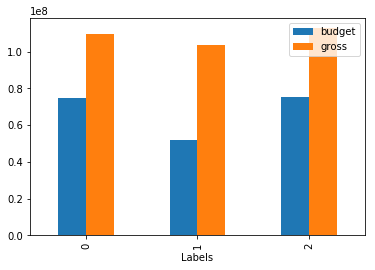

In [287]:
figure = merge_label.groupby('Labels').mean()[['budget', 'gross']].plot(kind = 'bar')
figure.figure.savefig('../plots/budget.png')

In [297]:
grouped_one  = merge_label.groupby(['Labels', 'genre']).count()['titles'] 
final = grouped_one.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [298]:
label_0 = final.loc[[0]]
label_1 = final.loc[[1]]
label_2 = final.loc[[2]]

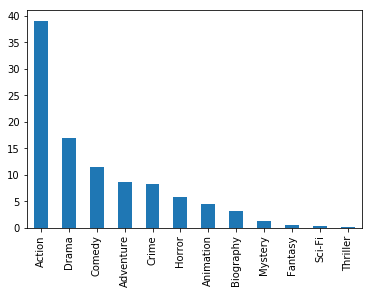

In [259]:
x = np.arange(len(gen_counts))

gen_counts.plot(kind = 'bar', stacked = True)

In [295]:
label_2.to_csv('../plots/label2.csv')

In [275]:
merge_label.tags.iloc[0]

array([ 0.01040424, -0.03711091, -0.01370902, -0.04845009,  0.01658836])

In [283]:
## Casino

merge_label.summaries.iloc[92]

array([-0.03448363,  0.0665714 ,  0.02095294,  0.06336372,  0.07264915])

In [284]:
## Toy Story

merge_label.summaries.iloc[23]

array([-0.02449034, -0.05477214,  0.00042241, -0.01975619,  0.00144789])

In [319]:
## Harm
## Fairness
## Ingroup
## Authority
## Purity

merge_label[merge_label.Labels == 0]['titles']

0                               Shawshank Redemption, The
3       Lord of the Rings: The Fellowship of the Ring,...
5                                               Inception
6                                          Godfather, The
7                                             Matrix, The
                              ...                        
999                                                8 Mile
1001                                        Hail, Caesar!
1003                                        Seven Sisters
1005                                         Crimson Peak
1006                       Rocky Horror Picture Show, The
Name: titles, Length: 424, dtype: object

In [314]:
merge_label[merge_label.Labels == 1]['titles']

4                                            Interstellar
21                                           Forrest Gump
23                                              Toy Story
31                                        American Beauty
36                                     Brokeback Mountain
                              ...                        
986                                            Annie Hall
994                                            Cinderella
998     How the Grinch Stole Christmas (a.k.a. The Gri...
1000                                             21 Grams
1004                                  Girl Next Door, The
Name: titles, Length: 182, dtype: object

In [315]:
merge_label[merge_label.Labels == 2]['titles']

1                                   Dark Knight, The
2         Star Wars: Episode VII - The Force Awakens
8       Star Wars: Episode III - Revenge of the Sith
13                            Dark Knight Rises, The
14      Star Wars: Episode II - Attack of the Clones
                            ...                     
988                                         Fog, The
990                                         Candyman
991                           Dead Alive (Braindead)
993                                            U-571
1002                                    Wolfman, The
Name: titles, Length: 401, dtype: object

In [333]:
grouped = pd.merge(scores, labeled, on = 'movieId')
label0 = grouped[grouped.Labels == 0]['titles']
label0.to_csv('../data/label_0.csv')

0                              Shawshank Redemption, The
3      Lord of the Rings: The Fellowship of the Ring,...
5                                              Inception
6                                         Godfather, The
7                                            Matrix, The
                             ...                        
984                                               8 Mile
986                                        Hail, Caesar!
988                                        Seven Sisters
990                                         Crimson Peak
991                       Rocky Horror Picture Show, The
Name: titles, Length: 416, dtype: object

In [331]:
label1 = grouped[grouped.Labels == 1]['titles']
label1.to_csv('../data/label_1.csv')

In [332]:
label2 = grouped[grouped.Labels == 2]['titles']
label2.to_csv('../data/label_2.csv')

In [335]:
users = pd.read_csv('../data/movie_lense/ratings.csv')

In [339]:
movie = pd.read_csv('../data/user_labels_movie_3.csv', index_col = 0)
labels = pd.read_csv('../data/user_labels_review_3.csv', index_col = 0)

In [381]:
movie.columns = ['label_movie', 'user']
labels.columns = ['label_user', 'user']

In [517]:
user = pd.merge(movie, labels, on = 'user')

In [518]:
replace_dict = {0:2, 1:1, 2:0}

user['label_movie'].replace(replace_dict, inplace = True)

In [519]:
user['same'] = user.label_movie == user.label_user

In [520]:
user['same'].sum() / user['same'].count()

0.6377870563674322

In [419]:
user['label_movie'].value_counts()

0    654
1    220
2     84
Name: label_movie, dtype: int64

In [420]:
user['label_new'].value_counts()

0    654
2    304
Name: label_new, dtype: int64

In [411]:
user['label_user'].value_counts()

1    451
2    337
0    170
Name: label_user, dtype: int64

In [525]:
acc = user.groupby('label_user').sum()['same'] / user.groupby('label_user').count()['same']

In [531]:
count = user.groupby('label_user').count()['same']

In [535]:
acc

label_user
0    45.882353
1    46.784922
2    95.548961
Name: same, dtype: float64

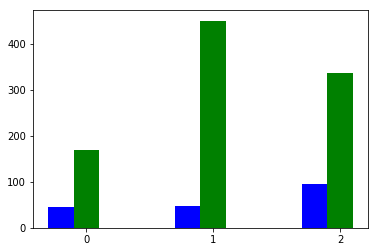

In [553]:
ax = plt.subplot(111)
x = acc.index
ax.bar(x-0.2, acc, width=0.2, color='b', align='center', label = 'count')
ax.bar(x, count, width=0.2, color='g', align='center', label = 'percentage')
ax.set_xticks([0, 1, 2]);
ax.set_xticklabels(['0', '1', '2']);

In [555]:
reviews = pd.read_csv('../data/imdb_review.csv')

KeyboardInterrupt: 

In [562]:
## Toy Story - 1

merge_label.iloc[22].reviews

array([ 0.00842817, -0.0477254 , -0.01941524, -0.0590938 ,  0.00945955])

In [606]:
clusters = pd.read_csv('../data/combo_moral.csv', index_col= 0)

In [607]:
clusters.drop(columns = ['movieId'], inplace = True)
# clusters = clusters.transpose()

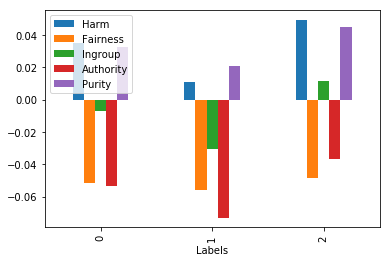

In [612]:
clusters.plot(kind = 'bar')
# plt.legend(location  = (1,1))

In [664]:
clusters = pd.read_csv('../data/user_review_moral.csv', index_col= 0)

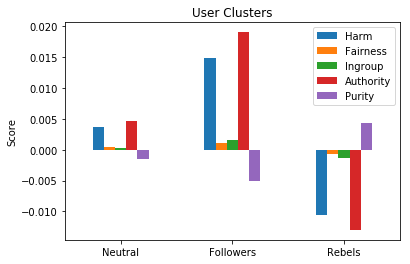

In [665]:
clusters.drop(columns = ['movieId'], inplace = True)
clusters['Cluster'] = ['Neutral', 'Followers', 'Rebels']
clusters.set_index('Cluster', inplace = True)
ax = clusters.plot(kind = 'bar');
ax.set_ylabel('Score')
ax.set_title('User Clusters')
ax.set_xlabel('')
ax.set_xticklabels(clusters.index, rotation = 0)
ax.figure.savefig('../plots/users.jpg')

In [623]:
clusters

,Harm,Fairness,Ingroup,Authority,Purity
Labels,,,,,
0,0.003704,0.000416,0.000363,0.004674,-0.001465
1,0.014914,0.001128,0.001559,0.019060,-0.005127
2,-0.010540,-0.000714,-0.001311,-0.013006,0.004352
